# CMSE 202 Project 

### &#9989; Aaron Ko, Sit Soe, Sean O'Dwyer, Abdulla Alblooshi
### &#9989; Section_001

## Background and Motivation

For CMSE 202, we learned skills to utilize machine learning algorithims to be able to create models that can predict data. For our project we were tasked to see if we could calculate a student's first year college GPA based on different features such as: high school GPA, SAT test scores, if you are a first-gen student, and more. We want to create a model to not only see if we are able to predict their college GPA but also if high school statistics matter in how succesful a student is in university. The variables we examined are those most common metrics used by university admission teams, but aren't necessarily the best predictors of college GPA.

## Methodology

We tried to predict the first year college GPA of students using OLS regression, heatmaps by analyzing the coorelation between our different features and the student's actual college GPA, we then reduced the number of features to improve the model, and SVM models where one of them was hypertuned by GridSearch to make our predictions more accurate.

### First, lets import everything we'll need:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import os
import seaborn as sn
from itertools import cycle
import time

# sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.decomposition import PCA 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

### Now that we have all our packages, lets start reading in our dataset that we'll need to answer our question

#### CSV file to be used:
`FirstYearGPA.csv` contains data about first year college student's GPA as well as their high school GPA, SAT scores, among other things.

### Cleaning up the dataset:

In [2]:
data = pd.read_csv("FirstYearGPA.csv")
data.head()

,Unnamed: 0,GPA,HSGPA,SATV,SATM,Male,HU,SS,FirstGen,White,CollegeBound
0,1,3.06,3.83,680,770,1,3.0,9.0,1,1,1
1,2,4.15,4.00,740,720,0,9.0,3.0,0,1,1
2,3,3.41,3.70,640,570,0,16.0,13.0,0,0,1
3,4,3.21,3.51,740,700,0,22.0,0.0,0,1,1
4,5,3.48,3.83,610,610,0,30.5,1.5,0,1,1


### Drop NA and unnecessary columns in the data:

In [3]:
data = data.dropna()
# Remove unamed column
data = data.drop(columns = ['Unnamed: 0'])
data.head()

,GPA,HSGPA,SATV,SATM,Male,HU,SS,FirstGen,White,CollegeBound
0,3.06,3.83,680,770,1,3.0,9.0,1,1,1
1,4.15,4.00,740,720,0,9.0,3.0,0,1,1
2,3.41,3.70,640,570,0,16.0,13.0,0,0,1
3,3.21,3.51,740,700,0,22.0,0.0,0,1,1
4,3.48,3.83,610,610,0,30.5,1.5,0,1,1


## OLS Regression With All Features

In [8]:
attr_names = [ "HSGPA", "SATV", 'SATM', "Male" , "HU", "SS", "FirstGen", "White", "CollegeBound"]

x_train = data[attr_names]
y_train = data['GPA']

model_log = sm.OLS(y_train, sm.add_constant(x_train))
results = model_log.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     12.48
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           8.67e-16
Time:                        18:42:19   Log-Likelihood:                -95.669
No. Observations:                 219   AIC:                             211.3
Df Residuals:                     209   BIC:                             245.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5269      0.349      1.511   

## Heatmap Showing Coorelations between Features

In [9]:
numeric_col = ["GPA", "HSGPA", "SATV", 'SATM', "Male" , "HU", "SS", "FirstGen", "White", "CollegeBound"]
 
# Correlation Matrix formation 
corr_matrix = data.loc[:,numeric_col].corr()
print(corr_matrix)

                   GPA     HSGPA      SATV      SATM      Male        HU  \
GPA           1.000000  0.446887  0.304311  0.194344  0.052849  0.314656   
HSGPA         0.446887  1.000000  0.210321  0.152840 -0.090317  0.116031   
SATV          0.304311  0.210321  1.000000  0.526944  0.145557  0.098749   
SATM          0.194344  0.152840  0.526944  1.000000  0.370992 -0.009602   
Male          0.052849 -0.090317  0.145557  0.370992  1.000000 -0.018844   
HU            0.314656  0.116031  0.098749 -0.009602 -0.018844  1.000000   
SS           -0.003569 -0.017254 -0.026470 -0.087840  0.035076 -0.306608   
FirstGen     -0.156577  0.064186 -0.256577 -0.177387 -0.076105 -0.212566   
White         0.281772  0.046047  0.368234  0.259465  0.076960  0.125934   
CollegeBound -0.063025 -0.200039  0.064845  0.039322  0.099818 -0.029972   

                    SS  FirstGen     White  CollegeBound  
GPA          -0.003569 -0.156577  0.281772     -0.063025  
HSGPA        -0.017254  0.064186  0.046047   

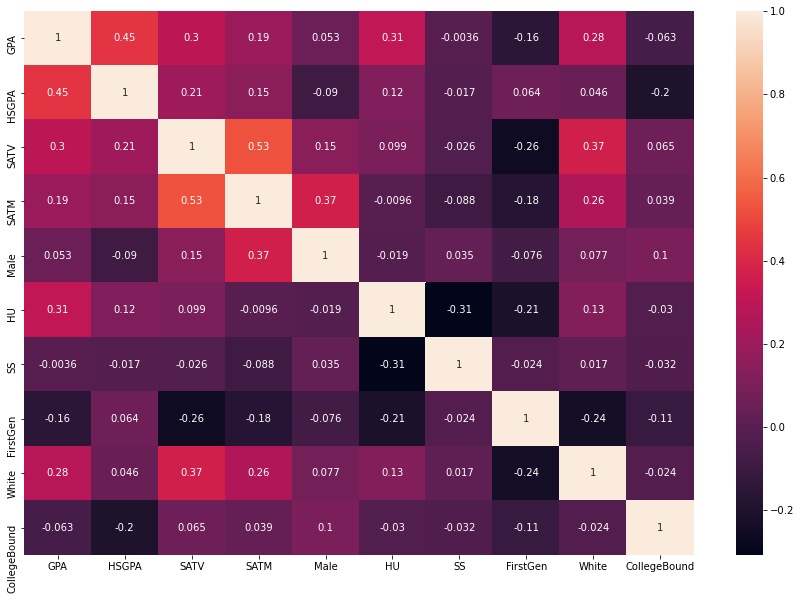

In [10]:
#Using heatmap to visualize the correlation matrix
fig, ax = plt.subplots(figsize=(15, 10))
sn.heatmap(corr_matrix, annot=True)
plt.show()

## New OLS with Restricted Features

In [16]:
# Remove and experiment based on either heatmap or P-Values but not both

attr_names1 = [ "HSGPA", "SATV", "HU", "FirstGen", "White"]

x_train1 = data[attr_names1]
y_train1 = data['GPA']


model_log1 = sm.OLS(y_train1, sm.add_constant(x_train1))
results1 = model_log1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     22.02
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           9.13e-18
Time:                        18:43:24   Log-Likelihood:                -97.146
No. Observations:                 219   AIC:                             206.3
Df Residuals:                     213   BIC:                             226.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6774      0.281      2.411      0.0

## Regression Plots

Plots of our regression show that it is not a very good fit. We made plots of our most predictive feature, high school gpa, to look further into our model. Our residuals plot shows that our residuals are randomly distributed, meaning linear regression can be useful for this data because the relationship is linear. Our partial regression plots are scattered and show weak correlation, unsurprising considering the weak R-squared value of our model.

eval_env: 1


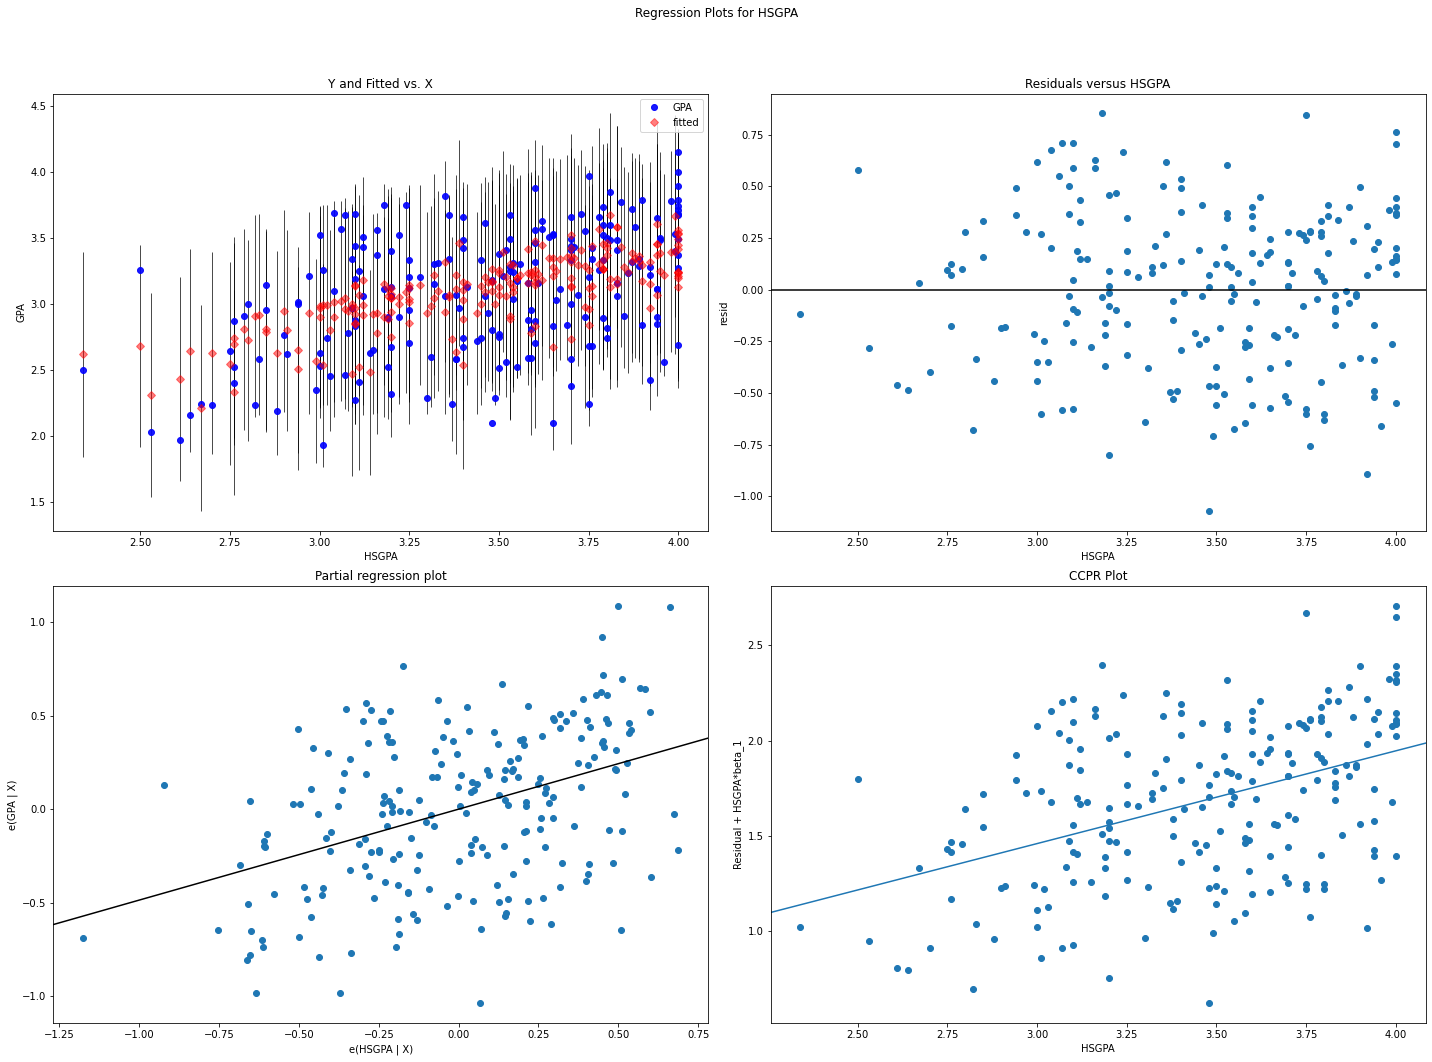

In [17]:
fig = plt.figure(figsize = [20,15])
fig = sm.graphics.plot_regress_exog(results1, "HSGPA", fig = fig)
plt.show()

### Accuracy Score based on SVR with Restricted Features

In [18]:
X = data[attr_names1]
y = data.GPA

#lab = preprocessing.LabelEncoder()
#y_transformed = lab.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
  
svm_model_linear = SVR(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)

# Accuracy model is incorrect 
accuracy = svm_model_linear.score(X_test, y_test)
print("The accuracy score for the model is:", accuracy)

The accuracy score for the model is: 0.19783744400730474


## GridSearch for Tuning Hyperparameters

## DO NOT RERUN THE CELL BELOW

In [61]:
###############################################################################
# Train a SVM classification model

start = time.time()

#make some temporary variables so you can change this easily
X_train = X_train
y_train = y_train.astype(int)

print("Fitting the classifier to the training set")
# a dictionary of hyperparameters: key is the name of the parameter, value is a list of values to test
#small gamma values
param_grid = {'C': [1, 2, 50, 75, 90],
              'gamma': [0.005, 0.05, 0.1, 0.5, 1.0],
              'kernel': ['linear','rbf']}
# make a classifier by searching over a classifier and the parameter grid
clf = GridSearchCV(SVR(), param_grid)

# we have a "good" classifier (according to GridSearchCV), how's it look
clf = clf.fit(X_train, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)
print("Best parameters found by grid search:")
print(clf.best_params_)

end = time.time()
print("Runtime",end - start)

Fitting the classifier to the training set
Best estimator found by grid search:
SVR(C=1, gamma=0.005, kernel='linear')
Best parameters found by grid search:
{'C': 1, 'gamma': 0.005, 'kernel': 'linear'}
Runtime 369.64550733566284


### Results From Gridsearch
Fitting the classifier to the training set
 
Best estimator found by grid search:
 
 * SVR(C=1, gamma=0.005, kernel='linear')
 
Best parameters found by grid search:
 
 * {'C': 1, 'gamma': 0.005, 'kernel': 'linear'}
 
Runtime 406.69805812835693

### New Parameters Found By GridSearch

In [19]:
X2 = data[attr_names1]
y2 = data.GPA

#lab = preprocessing.LabelEncoder()
#y_transformed = lab.fit_transform(y)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state = 0)
  
svm_model_linear2 = SVR(kernel = 'linear', C = 1, gamma=0.005).fit(X_train2, y_train2)
svm_predictions2 = svm_model_linear.predict(X_test2)

# Accuracy model is incorrect 
accuracy2 = svm_model_linear2.score(X_test2, y_test2)
print("The accuracy score for the model is:", accuracy2)

The accuracy score for the model is: 0.19783744400730474


# Results

### OLS:

We tried a couple of concepts that we learned in CMSE  202 for this project. Our first model was an OLS model that used all the features in the dataset, it yielded unsatisfactory results for predicting first year college GPA with an R-squared value of only 0.35. However, it showed us what variables were statistically significant which were high school GPA, humanity courses credits, and whether the subject was white or not. So we attempted another OLS regression with only those features but it still gave us bad results with an R-squared value of 0.34. We also made a heatmap and fitted graphs which were fine tuned by eliminating unnecessary features, they illustrated a weak correlation and were unable to predict most first year GPA's.

### SVM:

For our SVM model, we used SVR for classification since SVC could not work with our data. Our SVM model had an abysmal accuracy score of 0.19 which clearly means our model is bad at predicting GPA. Since we were using SVR, we could not calculate a confusion matrix, recall, or precision.

### GridSearch

GridSearch was used to determine the best values for C, gamma, and the kernel for tuning our SVM. According to GridSearch, the most optimal values were 1 for C, which indicates that our margins were large, 0.005 for gamma, and linear for the kernel. Even with the values provided by GridSearch, they did not improve our SVM model and the accuracy score remained a very low 0.19.

## Conclusion

Our OLS models revealed that there are certain features that are not good predictors for first year college GPA. For example, SAT scores had a p-value that was less than 0.05 which means they're not statistically significant. This is interesting because some colleges use SAT scores as the main metric for admission. A bad SAT score does not necessarily mean the student will have a bad GPA in his first year, and vice versa. According to OLS, High school GPA is statistically significant but it is a weak predictor, with a correlation coefficient of only 0.49. Plots showed that our high school GPA residuals were fairly large, though randomly distributed. This means that the shape of our relationship between high school and first year GPA is accurate to the data, but it's just not predictible.  

For our SVM model, it also failed at being a good predictor of first year college GPA based on the testing data. Even after hypertuning the parameters using GridSearch, it did not improve the accuracy score of our SVM model at all, it remained equally inaccurate. There does not appear to be a strong relationship between first year college GPA and any of the other fetures.  

What we learned is you can not predict first year college GPA using our features, but this is compelling because our features are the most common metrics used by colleges for admission. However, there has been a recent shift lately where the college admission essay is more impactful than your grades in high school or your SAT score, and this might be the reason.

## Refrences

* `Dataset:`  https://www.kaggle.com/datasets/ukveteran/first-year-gpa-for-college-students
* `SVMs:`  https://msu-cmse-courses.github.io/cmse202-F22-jb/daily/Day-20/Day-20_In-Class_SVMs2-STUDENT.html
* `Classification:`  https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/
* `Grid Search:`  https://scikit-learn.org/stable/modules/grid_search.html